In [51]:
"""
Problem Statement 2: Perform a segmentation study on the dataset to display useful information
using any visualization library.

My expereince with the phrase 'segmentation study' is very limited, although I infer given the need
for a visualization library that some other data science techniques should be applied by breaking
the data down further. Specifically clustering, d-trees, and other methods of extracting information
from large amounts of data.

Specifically, I shall use a d-tree to uncover a deeper understanding of the information
that neural networks obsfucate.

"""

"\nProblem Statement 2: Perform a segmentation study on the dataset to display useful information\nusing any visualization library.\n\nMy expereince with the phrase 'segmentation study' is very limited, although I infer given the need\nfor a visualization library that some other data science techniques should be applied by breaking\nthe data down further. Specifically clustering, d-trees, and other methods of extracting information\nfrom large amounts of data.\n\nSpecifically, I shall use a d-tree and a cluster to uncover a deeper understanding of the information\nthat neural networks obsfucate.\n\n"

In [52]:
###############################
# Data Import, Clean, Prepare #
###############################

# This step is very similar to problem statement 1. Clear out bad data, change heading names, etc.

import pandas as pd
import numpy as np
import re

# Get the data into python with Pandas
trainData = pd.read_csv("au_train.csv", header=0)
testData = pd.read_csv("au_test.csv", header=0)
print ("original data", trainData.shape)


# check for and remove duplicates
trainData = trainData.drop_duplicates()
testData = testData.drop_duplicates()
print("deduped size", trainData.shape)


# remove data with missing attributes. Any '?' will be removed
trainData = trainData.replace(to_replace=re.compile("\?"), value=np.NaN)
testData = testData.replace(to_replace=re.compile("\?"), value=np.NaN)
#print (data2)
trainData = trainData.dropna(axis=0, how='any')
testData.replace(to_replace=re.compile("\?"), value=np.NaN)
print ("without missing data", trainData.shape)


# Check for and remove crazy ages (negative and anthing older than 130)
trainData = trainData.query('age <= 130')
testData = testData.query('age <= 130')
trainData = trainData.query('age > 0')
testData = testData.query('age > 0')
print ("without bad ages", trainData.shape)

# rename inconvenient column names (due to hyphen ('-') being reguarded as a subtraction symbol)
trainData = trainData.rename(index=str, columns={"education-num":"education_num", "capital-gain":"capital_gain", "capital-loss":"capital_loss", "hours-per-week":"hours_per_week"})
testData = testData.rename(index=str, columns={"education-num":"education_num", "capital-gain":"capital_gain", "capital-loss":"capital_loss", "hours-per-week":"hours_per_week"})

# Check for and remove negative amounts (fnlwgt, education-num, capital-gain, capital-loss, hours-per-week)
trainData = trainData.query('fnlwgt > 0')
trainData = trainData.query('education_num > 0')
trainData = trainData.query('capital_gain >= 0')
trainData = trainData.query('capital_loss >= 0')
trainData = trainData.query('hours_per_week >= 0')

testData = testData.query('fnlwgt > 0')
testData = testData.query('education_num > 0')
testData = testData.query('capital_gain >= 0')
testData = testData.query('capital_loss >= 0')
testData = testData.query('hours_per_week >= 0')
print ("without negative amounts", trainData.shape)



original data (32561, 15)
deduped size (32537, 15)
without missing data (30139, 15)
without bad ages (30139, 15)
without negative amounts (30139, 15)


In [53]:
#####################################################
# Prepare the Data (Normalize, transform type, etc) #
#####################################################

# Any one hot, dummy, normalization, etc

def dummy_encode(data, columns, concatColumns):
    """
    @param data: a pandas dataframe
    @param columns: a list of strings of the columns to dummy_encode
    @concatColumns: a list of strings of the columns to simply add to the returnData
    @return returnData: a pandas dataframe with the dummy encoded data
    
    """
    print('Beginning encoding.')
    returnData = pd.DataFrame() # create the return variable
    for value in columns:
        print ("encoding ", value, "...")
        dummies = pd.get_dummies(data[value], prefix=value, drop_first=False) #use built in dummy encoding
        returnData = pd.concat([returnData, dummies], axis=1)
    for val in concatColumns:
        # normalize the continuous data
        print ("encoding ", val, "...")
        returnData = pd.concat([returnData, data[val]], axis=1)
    print ('encoding complete.')
    return returnData


# extract out only the columns we are going to run
# colsToEncode are categorical variables that we need to dummy encode. 
# coldToConcat are appended to the return of the method above, and also normalized (continuous variables)
colsToEncode = ['class'] 
colsToConcat = ['education_num', 'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']


                                
                                
# Move the class data to the front of the matrix
trainData = dummy_encode(trainData, colsToEncode, colsToConcat)
trainData = trainData.drop(axis=1, labels=['class_ >50K'])
trainCols = list(trainData)
trainCols.insert(0, trainCols.pop(trainCols.index('class_ <=50K')))
#trainCols.insert(0, trainCols.pop(trainCols.index('class_ >50K')))
trainData = trainData.loc[:, trainCols]

                                
testData = dummy_encode(testData, colsToEncode, colsToConcat)
testData = testData.drop(axis=1, labels=['class_ >50K.'])                                
testCols = list(testData)
testCols.insert(0, testCols.pop(testCols.index('class_ <=50K.')))
#testCols.insert(0, testCols.pop(testCols.index('class_ >50K.')))

testData = testData.loc[:, testCols]


# Create training and test sets
x_train = trainData.iloc[:, 1:]
y_train = trainData.iloc[:, 0]

x_test = testData.iloc[:, 1:]
y_test = testData.iloc[:, 0]



Beginning encoding.
encoding  class ...
encoding  education_num ...
encoding  age ...
encoding  fnlwgt ...
encoding  capital_gain ...
encoding  capital_loss ...
encoding  hours_per_week ...
encoding complete.
Beginning encoding.
encoding  class ...
encoding  education_num ...
encoding  age ...
encoding  fnlwgt ...
encoding  capital_gain ...
encoding  capital_loss ...
encoding  hours_per_week ...
encoding complete.


In [54]:
##################################
# Create and Train Decision Tree #
##################################

from sklearn import tree

dTreeClassifier = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)
dTreeClassifier = dTreeClassifier.fit(x_train, y_train)
print (dTreeClassifier)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [55]:
############################### 
# Visualize the Decision Tree #
###############################
import graphviz
from IPython.display import SVG

print (x_train[:0])
print (y_train[:0])

graph = Source(tree.export_graphviz(dTreeClassifier, out_file= None, feature_names=colsToConcat, class_names=['>50K', '<=50K'], filled=True, rounded=True))

print("done")

Empty DataFrame
Columns: [education_num, age, fnlwgt, capital_gain, capital_loss, hours_per_week]
Index: []
Series([], Name: class_ <=50K, dtype: float64)
done


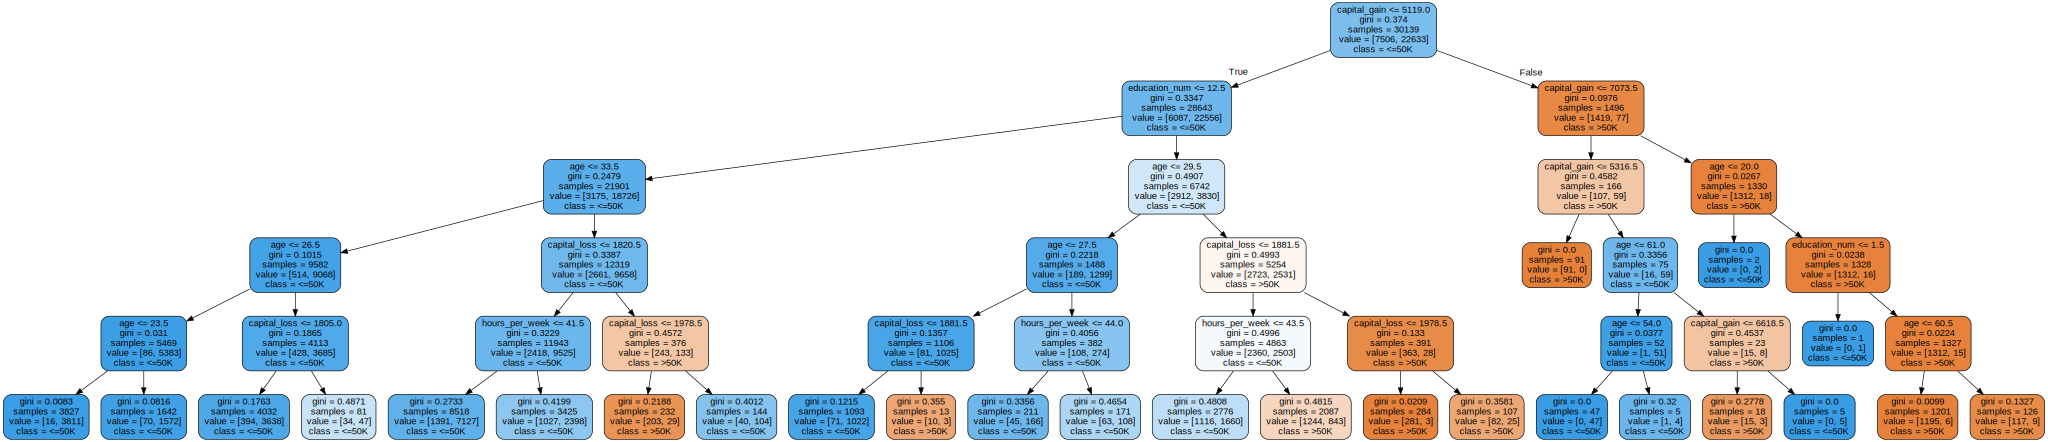

In [56]:
graph

In [ ]:
# # Analyis of D-Tree #
#####################

"""
The tree was reduced to 5 layers with a requirement of 5 samples per split, creating a more manageable
tree. Additionally, only continuous features were anaylzed to help further reduce the complexity, and 
to remain in a metric state of analysis.

The major features displayed here appear to be education_num, age, and capital gain. Education less than 12.5
years, and being less than 33.5 years old appears via this D-Tree to be a strong indicator of salary class being less than 
50K.

On the right side of the tree, it becomes a little more mixed (by GINI score), although only 1496 of the ~30K
samples are split via capital gain at the root. It does seem to follow that those with capital gain exceeding 5K
may have salaries higher than 50K, and the D-Tree presents this feature as a high level decision point.

From there, individuals below retirement age (~60 yrs) also appear to classified frequently >50K, as the
D-Tree uses age many times in this area.

Curiously, for the right hand of the tree, hours_per_week is not used, indicating that there may be other relationships
between these values to make such a feature poorly suited to differentiate them.


"""